# library

In [1]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM

from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report

from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [8]:
df_AAC= pd.read_csv("/content/drive/MyDrive/kan/AAC_all.csv")
df_AESNN= pd.read_csv("/content/drive/MyDrive/kan/AESNN3_all.csv")
df_Zscale= pd.read_csv("/content/drive/MyDrive/kan/Zscale_all.csv")
df_Blosume= pd.read_csv("/content/drive/MyDrive/kan/blosume62_all.csv")
df_OPF= pd.read_csv("/content/drive/MyDrive/kan/opf10bit_all.csv")
df_merged= pd.read_csv("/content/drive/MyDrive/kan/merged all.csv")

# **KAN [ kormologov analond model ]**
installation procedure from pykan doccumentation, for more details :  https://kindxiaoming.github.io/pykan/Examples/Example_3_classfication.html

**Requirment:**


*   torch==2.2.1+cu121


---


*  matplotlib==3.7.1


---



*   sklearn==1.2.2


---



*   moviepy==1.0.3




In [3]:
!pip install pykan

In [4]:
import torch
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import moviepy.video.io.ImageSequenceClip

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [9]:

import csv
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

def load_iris_dataset(csv_file):

    iris = pd.read_csv(csv_file)
    data_tensor = torch.tensor(iris.iloc[:, :-1].values, dtype=torch.float)
    target_tensor = torch.tensor(iris.iloc[:, -1].values, dtype=torch.long)

    # Convert to PyTorch tensors
    #data_tensor = torch.tensor(data, dtype=torch.float32)
    #target_tensor = torch.tensor(target, dtype=torch.long)

    # Split dataset into train and test sets
    train_data= train, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1, shuffle=False)

    train_inputs = torch.empty(0, 20, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 20, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in train_loader:
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in test_loader:
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels
    dataset['test_label'] = test_labels

    return dataset

iris_dataset = df_AAC

# main

In [ ]:
import csv
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

def load_iris_dataset(csv_file):
    iris = df_AAC
    data_tensor = torch.tensor(iris.iloc[:, :-1].values, dtype=torch.float)
    target_tensor = torch.tensor(iris.iloc[:, -1].values, dtype=torch.long)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=10, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=10, shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_inputs = torch.empty(0, 20, device=device)  # Adjusted to 4 to match the number of features in the Iris dataset
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 20, device=device)  # Adjusted to 4 to match the number of features in the Iris dataset
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in train_loader:
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in test_loader:
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels
    dataset['test_label'] = test_labels

    return dataset

# Correctly calling the function
csv_file = df_AAC
iris_dataset = load_iris_dataset(csv_file)

# Printing the shapes of the data tensors
print("Train data shape: {}".format(iris_dataset['train_input'].shape))
print("Train target shape: {}".format(iris_dataset['train_label'].shape))
print("Test data shape: {}".format(iris_dataset['test_input'].shape))
print("Test target shape: {}".format(iris_dataset['test_label'].shape))


Train data shape: torch.Size([322, 20])
Train target shape: torch.Size([322])
Test data shape: torch.Size([81, 20])
Test target shape: torch.Size([81])


In [ ]:

print("Train data shape: {}".format(iris_dataset['train_input'].shape))
print("Train target shape: {}".format(iris_dataset['train_label'].shape))
print("Test data shape: {}".format(iris_dataset['test_input'].shape))
print("Test target shape: {}".format(iris_dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([322, 20])
Train target shape: torch.Size([322])
Test data shape: torch.Size([81, 20])
Test target shape: torch.Size([81])


AAC 20
ASENN 93
BLOSUME 620
Zscale 155
OFP 310


In [ ]:
model = KAN(width=[20, 5, 2], device=device)

model(iris_dataset['train_input'])

tensor([[0.0253, 0.0697],
        [0.0525, 0.1075],
        [0.0347, 0.0744],
        [0.0335, 0.0759],
        [0.0407, 0.0972],
        [0.0256, 0.0778],
        [0.0360, 0.0781],
        [0.0491, 0.0913],
        [0.0364, 0.0808],
        [0.0486, 0.1158],
        [0.0280, 0.0662],
        [0.0330, 0.0735],
        [0.0358, 0.0651],
        [0.0402, 0.1092],
        [0.0376, 0.0730],
        [0.0373, 0.0608],
        [0.0579, 0.1315],
        [0.0420, 0.0844],
        [0.0356, 0.0640],
        [0.0352, 0.0860],
        [0.0338, 0.0773],
        [0.0267, 0.0782],
        [0.0276, 0.0743],
        [0.0376, 0.0886],
        [0.0378, 0.0728],
        [0.0147, 0.0519],
        [0.0416, 0.0842],
        [0.0320, 0.0734],
        [0.0360, 0.1011],
        [0.0333, 0.0748],
        [0.0248, 0.0436],
        [0.0352, 0.0850],
        [0.0337, 0.0934],
        [0.0206, 0.0531],
        [0.0400, 0.0710],
        [0.0493, 0.0777],
        [0.0394, 0.0861],
        [0.0250, 0.0594],
        [0.0

In [ ]:
#results = model.train(iris_dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc))

#results = model.train(iris_dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                     # loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10)

In [ ]:
import torch
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

def sensitivity(outputs, labels):
    # Calculate True Positive Rate (TPR) or sensitivity
    cm = confusion_matrix(labels.cpu().numpy(), torch.argmax(outputs, dim=1).cpu().numpy())
    return cm[1, 1] / (cm[1, 0] + cm[1, 1])

def specificity(outputs, labels):
    # Calculate True Negative Rate (TNR) or specificity
    cm = confusion_matrix(labels.cpu().numpy(), torch.argmax(outputs, dim=1).cpu().numpy())
    return cm[0, 0] / (cm[0, 0] + cm[0, 1])

def auc_score(outputs, labels):
    # Calculate AUC score
    probabilities = torch.softmax(outputs, dim=1).cpu().detach().numpy()
    return roc_auc_score(labels.cpu().numpy(), probabilities[:, 1])

def mcc_score(outputs, labels):
    # Calculate Matthews correlation coefficient (MCC)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return matthews_corrcoef(labels.cpu().numpy(), predictions)

def kappa_score(outputs, labels):
    # Calculate Kappa score
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return cohen_kappa_score(labels.cpu().numpy(), predictions)

def precision(outputs, labels):
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return precision_score(labels.cpu().numpy(), predictions)

def recall(outputs, labels):
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return recall_score(labels.cpu().numpy(), predictions)

def f1(outputs, labels):
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return f1_score(labels.cpu().numpy(), predictions)

def train_acc():
    return torch.mean((torch.argmax(model(iris_dataset['train_input']), dim=1) == iris_dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(iris_dataset['test_input']), dim=1) == iris_dataset['test_label']).float())

def train_sensitivity():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return sensitivity(outputs, labels)

def test_sensitivity():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return sensitivity(outputs, labels)

def train_specificity():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return specificity(outputs, labels)

def test_specificity():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return specificity(outputs, labels)

def train_auc_score():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return auc_score(outputs, labels)

def test_auc_score():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return auc_score(outputs, labels)

def train_mcc_score():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return mcc_score(outputs, labels)

def test_mcc_score():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return mcc_score(outputs, labels)

def train_kappa_score():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return kappa_score(outputs, labels)

def test_kappa_score():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return kappa_score(outputs, labels)

def train_precision():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return precision(outputs, labels)

def test_precision():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return precision(outputs, labels)

def train_recall():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return recall(outputs, labels)

def test_recall():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return recall(outputs, labels)

def train_f1():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return f1(outputs, labels)

def test_f1():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return f1(outputs, labels)

results = model.train(iris_dataset, device=device, metrics=(train_acc, test_acc,
                                                                         train_sensitivity, test_sensitivity,
                                                                         train_specificity, test_specificity,
                                                                         train_auc_score, test_auc_score,
                                                                         train_mcc_score, test_mcc_score,
                                                                         train_kappa_score, test_kappa_score,
                                                                         train_precision, test_precision,
                                                                         train_recall, test_recall,
                                                                         train_f1, test_f1),
                      loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS",steps= 5, lamb_entropy=5)




train loss: 3.88e-02 | test loss: 1.51e+00 | reg: 1.60e+02 : 100%|████| 5/5 [00:16<00:00,  3.25s/it]


train print

In [ ]:
print("train Sensitivity:", results['train_sensitivity'][-1])
print("train Spe:", results['train_specificity'][-1])
print("train AUC", results['train_auc_score'][-1])
print("train MCC", results['train_mcc_score'][-1])
print("train KAPPA", results['train_kappa_score'][-1])
print("train PRE", results['train_precision'][-1])
print("train F1", results['train_f1'][-1])
print("train REC", results['train_recall'][-1])
print("train Accuracy", results['train_acc'][-1])

train Sensitivity: 1.0
train Spe: 1.0
train AUC 1.0
train MCC 1.0
train KAPPA 1.0
train PRE 1.0
train F1 1.0
train REC 1.0
train Accuracy 1.0


test print

In [ ]:
print("test Sensitivity:", results['test_sensitivity'][-1])
print("test Spe:", results['test_specificity'][-1])
print("test AUC", results['test_auc_score'][-1])
print("test MCC", results['test_mcc_score'][-1])
print("test KAPPA", results['test_kappa_score'][-1])
print("test PRE", results['test_precision'][-1])
print("test F1", results['test_f1'][-1])
print("test Rec", results['test_recall'][-1])
print("test Accuracy", results['test_acc'][-1])

test Sensitivity: 0.8378378378378378
test Spe: 0.75
test AUC 0.8562653562653564
test MCC 0.5860407139813055
test KAPPA 0.5815861440291704
test PRE 0.7380952380952381
test F1 0.7848101265822786
test Rec 0.8378378378378378
test Accuracy 0.790123462677002


roc

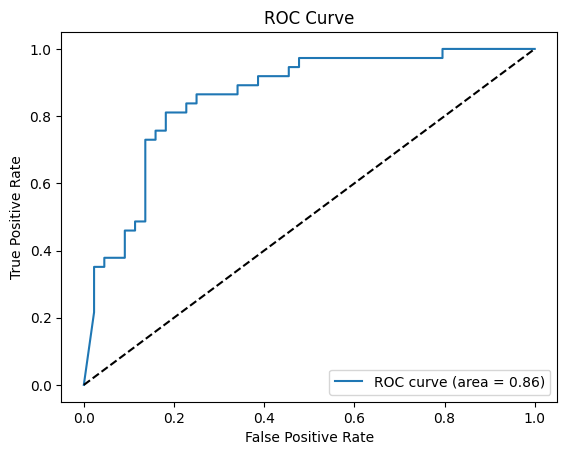

In [ ]:

outputs = model(iris_dataset['test_input'])
probabilities = torch.softmax(outputs, dim=1).cpu().detach().numpy()
fpr, tpr, thresholds = roc_curve(iris_dataset['test_label'].cpu().numpy(), probabilities[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score(outputs, iris_dataset['test_label']))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **cv ( cross-validation apply with KAN model)**


Created function for the evaluation metrics
such as:



*   sensitivity
*   specificity


*   MCC
*   Kappa score


*   Precision
*   Recall


*   F1 score
*   AUC scores


*   Accuracy

















In [10]:
import torch
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

def sensitivity(outputs, labels):
    # Calculate True Positive Rate (TPR) or sensitivity
    cm = confusion_matrix(labels.cpu().numpy(), torch.argmax(outputs, dim=1).cpu().numpy())
    return cm[1, 1] / (cm[1, 0] + cm[1, 1])

def specificity(outputs, labels):
    # Calculate True Negative Rate (TNR) or specificity
    cm = confusion_matrix(labels.cpu().numpy(), torch.argmax(outputs, dim=1).cpu().numpy())
    return cm[0, 0] / (cm[0, 0] + cm[0, 1])

def auc_score(outputs, labels):
    # Calculate AUC score
    probabilities = torch.softmax(outputs, dim=1).cpu().detach().numpy()
    return roc_auc_score(labels.cpu().numpy(), probabilities[:, 1])

def mcc_score(outputs, labels):
    # Calculate Matthews correlation coefficient (MCC)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return matthews_corrcoef(labels.cpu().numpy(), predictions)

def kappa_score(outputs, labels):
    # Calculate Kappa score
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return cohen_kappa_score(labels.cpu().numpy(), predictions)

def precision(outputs, labels):
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return precision_score(labels.cpu().numpy(), predictions)

def recall(outputs, labels):
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return recall_score(labels.cpu().numpy(), predictions)

def f1(outputs, labels):
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()
    return f1_score(labels.cpu().numpy(), predictions)

def train_acc():
    return torch.mean((torch.argmax(model(iris_dataset['train_input']), dim=1) == iris_dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(iris_dataset['test_input']), dim=1) == iris_dataset['test_label']).float())

def train_sensitivity():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return sensitivity(outputs, labels)

def test_sensitivity():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return sensitivity(outputs, labels)

def train_specificity():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return specificity(outputs, labels)

def test_specificity():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return specificity(outputs, labels)

def train_auc_score():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return auc_score(outputs, labels)

def test_auc_score():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return auc_score(outputs, labels)

def train_mcc_score():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return mcc_score(outputs, labels)

def test_mcc_score():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return mcc_score(outputs, labels)

def train_kappa_score():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return kappa_score(outputs, labels)

def test_kappa_score():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return kappa_score(outputs, labels)

def train_precision():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return precision(outputs, labels)

def test_precision():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return precision(outputs, labels)

def train_recall():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return recall(outputs, labels)

def test_recall():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return recall(outputs, labels)

def train_f1():
    outputs = model(iris_dataset['train_input'])
    labels = iris_dataset['train_label']
    return f1(outputs, labels)

def test_f1():
    outputs = model(iris_dataset['test_input'])
    labels = iris_dataset['test_label']
    return f1(outputs, labels)






Fold dataset using KFold Append the fold data to the dataset,

▶ please ***read the comments*** of this portion on how to process the folding of our analysis and our datasets

⏩ Printing the shapes of the ***data tensors*** for each fold



In [11]:
import csv
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import KFold

def load_iris_dataset(csv_file):
    # Load the dataset
    iris = df_Zscale
    data_tensor = torch.tensor(iris.iloc[:, :-1].values, dtype=torch.float)
    target_tensor = torch.tensor(iris.iloc[:, -1].values, dtype=torch.long)

    # Use KFold for cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    dataset = {
        'folds': []
    }

    # Iterate through each fold
    for fold, (train_indices, test_indices) in enumerate(kfold.split(data_tensor)):
        # Split data
        train_data, test_data = data_tensor[train_indices], data_tensor[test_indices]
        train_target, test_target = target_tensor[train_indices], target_tensor[test_indices]

        # Create data loaders
        train_loader = DataLoader(TensorDataset(train_data, train_target), batch_size=10, shuffle=True)
        test_loader = DataLoader(TensorDataset(test_data, test_target), batch_size=10, shuffle=True)

        train_inputs = torch.empty(0, train_data.size(1), device=device)
        train_labels = torch.empty(0, dtype=torch.long, device=device)
        test_inputs = torch.empty(0, test_data.size(1), device=device)
        test_labels = torch.empty(0, dtype=torch.long, device=device)

        # Concatenate all data into a single tensor on the specified device
        for data, labels in train_loader:
            train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
            train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

        for data, labels in test_loader:
            test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
            test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

        # Append the fold data to the dataset
        dataset['folds'].append({
            'train_input': train_inputs,
            'test_input': test_inputs,
            'train_label': train_labels,
            'test_label': test_labels
        })

    return dataset

# Correctly calling the function
csv_file = df_Zscale
iris_dataset = load_iris_dataset(csv_file)

# Printing the shapes of the data tensors for each fold
for fold_idx, fold_data in enumerate(iris_dataset['folds']):
    print(f"Fold {fold_idx + 1}")
    print("Train data shape: {}".format(fold_data['train_input'].shape))
    print("Train target shape: {}".format(fold_data['train_label'].shape))
    print("Test data shape: {}".format(fold_data['test_input'].shape))
    print("Test target shape: {}".format(fold_data['test_label'].shape))


Fold 1
Train data shape: torch.Size([362, 155])
Train target shape: torch.Size([362])
Test data shape: torch.Size([41, 155])
Test target shape: torch.Size([41])
Fold 2
Train data shape: torch.Size([362, 155])
Train target shape: torch.Size([362])
Test data shape: torch.Size([41, 155])
Test target shape: torch.Size([41])
Fold 3
Train data shape: torch.Size([362, 155])
Train target shape: torch.Size([362])
Test data shape: torch.Size([41, 155])
Test target shape: torch.Size([41])
Fold 4
Train data shape: torch.Size([363, 155])
Train target shape: torch.Size([363])
Test data shape: torch.Size([40, 155])
Test target shape: torch.Size([40])
Fold 5
Train data shape: torch.Size([363, 155])
Train target shape: torch.Size([363])
Test data shape: torch.Size([40, 155])
Test target shape: torch.Size([40])
Fold 6
Train data shape: torch.Size([363, 155])
Train target shape: torch.Size([363])
Test data shape: torch.Size([40, 155])
Test target shape: torch.Size([40])
Fold 7
Train data shape: torch.Siz

# Model applied of each feature extraction method
we used here 10 fold cross validation methods:

▶ where `model = KAN(width=[155, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')`
here  in width [155= features number, 5= hidden layers,and  2= output layers, we used 2 cause we have a 0 and 1 binary classification dataset]

▶ most importantly here all the feature extraction methods have used **5= hidden layers,and  2= output layers** and feature number used based on the *quantity of the features*


▶ Train the model  with `for epoch in range(400)` see the code and comments also

▶ Calculate **mean and standard deviation** of metrics





# Zscale

In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import StandardScaler

model = KAN(width=[155, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')


def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model(model, dataset, device):
    def to_cpu(tensor):
        return tensor.detach().cpu().numpy()

    def accuracy(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return (preds == labels).float().mean().item()

    def sensitivity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tp / (tp + fn)

    def specificity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tn / (tn + fp)

    def auc_score(outputs, labels):
        preds = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        return roc_auc_score(labels.cpu(), preds.cpu())

    def mcc_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return matthews_corrcoef(labels.cpu(), preds.cpu())

    def kappa_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return cohen_kappa_score(labels.cpu(), preds.cpu())

    def precision(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return precision_score(labels.cpu(), preds.cpu(), average='macro')

    def recall(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return recall_score(labels.cpu(), preds.cpu(), average='macro')

    def f1(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return f1_score(labels.cpu(), preds.cpu(), average='macro')

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'auc': auc_score,
        'mcc': mcc_score,
        'kappa': kappa_score,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    results = {f'train_{k}_list': [] for k in metrics.keys()}
    results.update({f'test_{k}_list': [] for k in metrics.keys()})

    for fold_data in dataset['folds']:
        train_inputs, train_labels = fold_data['train_input'], fold_data['train_label']
        test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']

        # Prepare data loaders
        train_dataset = TensorDataset(train_inputs, train_labels)
        test_dataset = TensorDataset(test_inputs, test_labels)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Define criterion and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        for epoch in range(400):  # with 400 epoch
            train_model(model, train_loader, criterion, optimizer, device)

        # Evaluate on training and testing data
        model.eval()
        with torch.no_grad():
            train_outputs = model(train_inputs.to(device))
            test_outputs = model(test_inputs.to(device))

        for metric_name, metric_func in metrics.items():
            train_metric_value = metric_func(train_outputs, train_labels.to(device))
            test_metric_value = metric_func(test_outputs, test_labels.to(device))
            results[f'train_{metric_name}_list'].append(train_metric_value)
            results[f'test_{metric_name}_list'].append(test_metric_value)

    # Calculate mean and standard deviation of metrics
    summary_results = {}
    for metric_name in metrics.keys():
        summary_results[f'train_{metric_name}_mean'] = np.mean(results[f'train_{metric_name}_list'])
        summary_results[f'train_{metric_name}_std'] = np.std(results[f'train_{metric_name}_list'])
        summary_results[f'test_{metric_name}_mean'] = np.mean(results[f'test_{metric_name}_list'])
        summary_results[f'test_{metric_name}_std'] = np.std(results[f'test_{metric_name}_list'])

    return summary_results

def load_iris_dataset(df_Zscale):

    # Convert the DataFrame to TensorDataset
    X = df_Zscale.iloc[:, :-1].values
    y = df_Zscale.iloc[:, -1].values
    X = StandardScaler().fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Create K-Folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    folds = []
    for train_idx, test_idx in kfold.split(X):
        folds.append({
            'train_input': X[train_idx],
            'train_label': y[train_idx],
            'test_input': X[test_idx],
            'test_label': y[test_idx]
        })
    return {'folds': folds}

iris_dataset = load_iris_dataset(df_Zscale)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

results = evaluate_model(model, iris_dataset, device)
print("Train Accuracy: {:.4f} ± {:.4f}".format(results['train_accuracy_mean'], results['train_accuracy_std']))
print("Test Accuracy: {:.4f} ± {:.4f}".format(results['test_accuracy_mean'], results['test_accuracy_std']))
print("Train Sensitivity: {:.4f} ± {:.4f}".format(results['train_sensitivity_mean'], results['train_sensitivity_std']))
print("Test Sensitivity: {:.4f} ± {:.4f}".format(results['test_sensitivity_mean'], results['test_sensitivity_std']))
print("Train Specificity: {:.4f} ± {:.4f}".format(results['train_specificity_mean'], results['train_specificity_std']))
print("Test Specificity: {:.4f} ± {:.4f}".format(results['test_specificity_mean'], results['test_specificity_std']))
print("Train AUC: {:.4f} ± {:.4f}".format(results['train_auc_mean'], results['train_auc_std']))
print("Test AUC: {:.4f} ± {:.4f}".format(results['test_auc_mean'], results['test_auc_std']))
print("Train MCC: {:.4f} ± {:.4f}".format(results['train_mcc_mean'], results['train_mcc_std']))
print("Test MCC: {:.4f} ± {:.4f}".format(results['test_mcc_mean'], results['test_mcc_std']))
print("Train Kappa: {:.4f} ± {:.4f}".format(results['train_kappa_mean'], results['train_kappa_std']))
print("Test Kappa: {:.4f} ± {:.4f}".format(results['test_kappa_mean'], results['test_kappa_std']))
print("Train Precision: {:.4f} ± {:.4f}".format(results['train_precision_mean'], results['train_precision_std']))
print("Test Precision: {:.4f} ± {:.4f}".format(results['test_precision_mean'], results['test_precision_std']))
print("Train Recall: {:.4f} ± {:.4f}".format(results['train_recall_mean'], results['train_recall_std']))
print("Test Recall: {:.4f} ± {:.4f}".format(results['test_recall_mean'], results['test_recall_std']))
print("Train F1 Score: {:.4f} ± {:.4f}".format(results['train_f1_mean'], results['train_f1_std']))
print("Test F1 Score: {:.4f} ± {:.4f}".format(results['test_f1_mean'], results['test_f1_std']))


TypeError: KAN.train() missing 1 required positional argument: 'dataset'

# graph

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File 

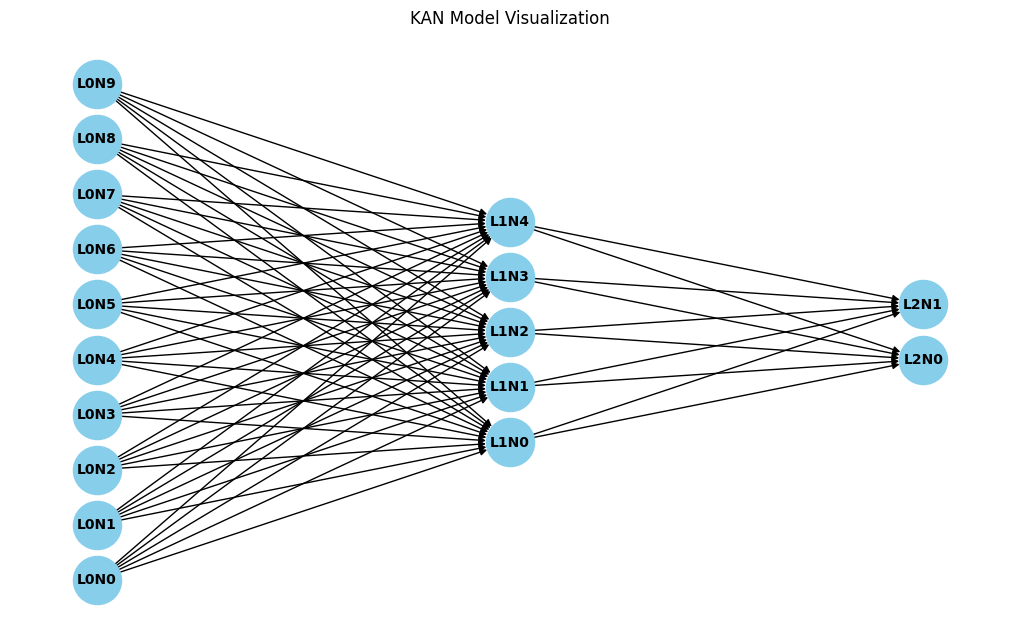

In [ ]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
import networkx as nx

def visualize_kan_model(width):
    # Create a directed graph
    G = nx.DiGraph()

    # Define the positions of nodes in the plot
    pos = {}
    layer_positions = []
    x_offset = 0

    # Create nodes for each layer and add to the graph
    for layer_index, num_nodes in enumerate(width):
        y_offset = - (num_nodes - 1) / 2  # Center the nodes in each layer
        layer_pos = []
        for node_index in range(num_nodes):
            node_id = f"L{layer_index}N{node_index}"
            G.add_node(node_id, layer=layer_index)
            pos[node_id] = (x_offset, y_offset + node_index)
            layer_pos.append(node_id)
        layer_positions.append(layer_pos)
        x_offset += 1  # Move to the next layer

    # Create edges with learnable activation functions
    for layer_index in range(len(width) - 1):
        for src_node in layer_positions[layer_index]:
            for dest_node in layer_positions[layer_index + 1]:
                G.add_edge(src_node, dest_node)

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=1200, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

    # Add edge labels to indicate learnable activation functions
    edge_labels = {(u, v): '' for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='Green')

    plt.title("KAN Model Visualization")
    plt.show()

# Define the width and visualize the model
width = [10, 5, 2]
visualize_kan_model(width)


In [ ]:
import torch
from torchviz import make_dot

# Dummy input to visualize the model
dummy_input = torch.randn(1, 155).to(model.device)

# Get the model graph
model_graph = make_dot(model(dummy_input), params=dict(model.named_parameters()))

# Save the model graph to a file or visualize it directly
model_graph.render("model_architecture", format="png")
model_graph.view()


'model_architecture.pdf'

In [ ]:
from graphviz import Digraph
from PIL import Image
from io import BytesIO

# Create a new directed graph
dot = Digraph(comment='KAN Model Training and Evaluation Process')

# Add nodes
dot.node('A', 'Load Dataset')
dot.node('B', 'Preprocess Data')
dot.node('C', 'K-Fold Cross-Validation')
dot.node('D', 'Initialize Model, Criterion, Optimizer')
dot.node('E', 'Train Model on Training Data')
dot.node('F', 'Evaluate Model on Test Data')
dot.node('G', 'Calculate Metrics')
dot.node('H', 'Compute Mean and Std Dev of Metrics')

# Add edges
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH'])

# Render the graph to a PNG file
graph = dot.pipe(format='png')

# Display the graph using PIL
image = Image.open(BytesIO(graph))
image.show()


In [ ]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='KAN Model Training and Evaluation Process')

# Add nodes
dot.node('A', 'Load Dataset')
dot.node('B', 'Preprocess Data')
dot.node('C', 'K-Fold Cross-Validation')
dot.node('D', 'Initialize Model, Criterion, Optimizer')
dot.node('E', 'Train Model on Training Data')
dot.node('F', 'Evaluate Model on Test Data')
dot.node('G', 'Calculate Metrics')
dot.node('H', 'Compute Mean and Std Dev of Metrics')

# Add edges
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH'])

# Render the graph
dot.render('KAN_model_process', format='png', view=True)


'KAN_model_process.png'

In [ ]:
model = KAN(width=[155, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
pip install torchviz


  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [ ]:
!pip install graphviz

In [ ]:
import torch
import graphviz

# Check the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the layer widths
layer_widths = [10, 5, 2]

# Create a new Digraph
dot = graphviz.Digraph()

# Add layers
for layer_idx, width in enumerate(layer_widths):
    with dot.subgraph(name=f'cluster_{layer_idx}') as c:
        c.attr(style='filled', color='lightgrey')
        c.node_attr.update(style='filled', color='white')
        for neuron_idx in range(width):
            if layer_idx == 0:
                c.node(f'Input_{neuron_idx}', shape='circle', label=f'{neuron_idx + 1}')
            elif layer_idx == len(layer_widths) - 1:
                c.node(f'Output_{neuron_idx}', shape='circle', label=f'{neuron_idx + 1}')
            else:
                c.node(f'Hidden_{layer_idx}_{neuron_idx}', shape='circle', label=f'{neuron_idx + 1}')

# Add edges
for layer_idx in range(len(layer_widths) - 1):
    for src_idx in range(layer_widths[layer_idx]):
        for dst_idx in range(layer_widths[layer_idx + 1]):
            if layer_idx == 0:
                dot.edge(f'Input_{src_idx}', f'Hidden_{layer_idx + 1}_{dst_idx}')
            elif layer_idx == len(layer_widths) - 2:
                dot.edge(f'Hidden_{layer_idx}_{src_idx}', f'Output_{dst_idx}')
            else:
                dot.edge(f'Hidden_{layer_idx}_{src_idx}', f'Hidden_{layer_idx + 1}_{dst_idx}')

# Add device information
dot.attr(label=f'Device: {device}', fontsize='20', fontcolor='blue')

# Render the graph
dot.render('KAN_model', format='png', view=True)


'KAN_model.png'

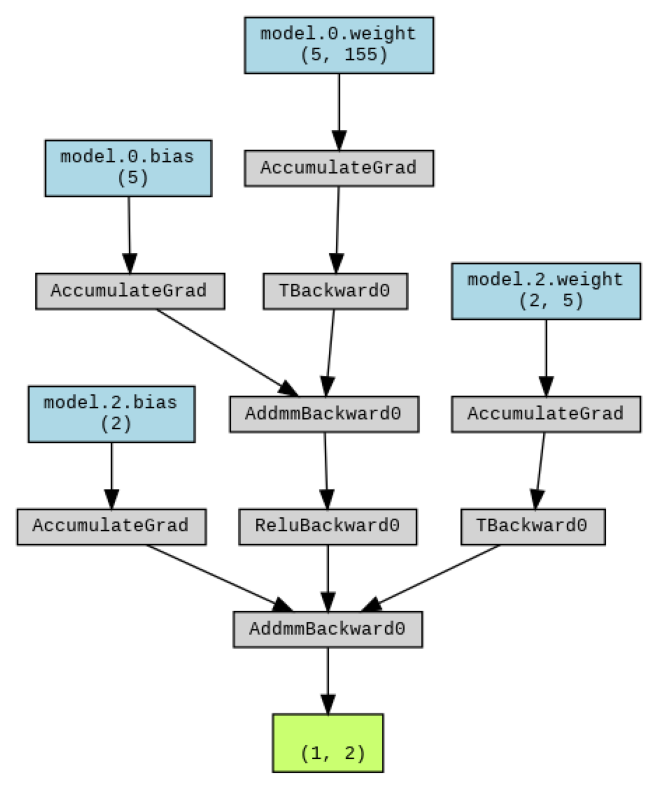

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchviz import make_dot

# Define a dummy KAN model
class KAN(nn.Module):
    def __init__(self, width, device):
        super(KAN, self).__init__()
        layers = []
        for i in range(len(width) - 1):
            layers.append(nn.Linear(width[i], width[i + 1]))
            if i < len(width) - 2:
                layers.append(nn.ReLU())
        self.model = nn.Sequential(*layers)
        self.device = device
        self.to(self.device)

    def forward(self, x):
        return self.model(x)

# Check the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Instantiate the model with specified widths
width = [155, 5, 2]
model = KAN(width=width, device=device)

# Generate dummy input
dummy_input = torch.randn(1, 155).to(device)

# Perform a forward pass to construct the graph
output = model(dummy_input)

# Visualize the computational graph
dot = make_dot(output, params=dict(model.named_parameters()))
dot.format = 'png'
graph = dot.pipe(format='png')

# Display the graph using matplotlib
from PIL import Image
from io import BytesIO

image = Image.open(BytesIO(graph))
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


## visualization

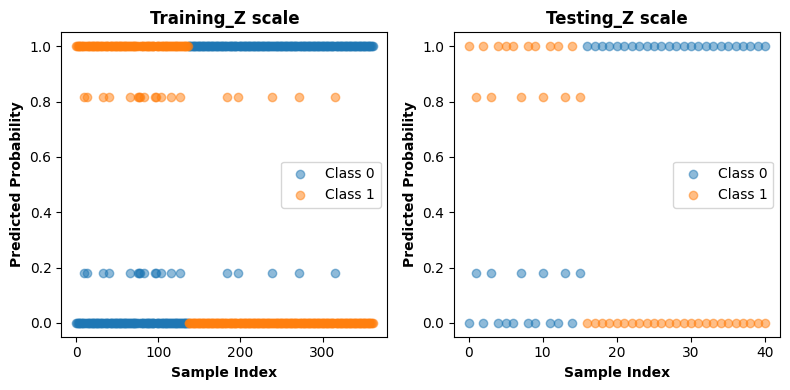

In [ ]:
def plot_predicted_probabilities(model, inputs, labels, device, dataset_type, ax):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs.to(device))

    probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()

    # Plotting predicted probabilities
    for class_idx in range(probabilities.shape[1]):
        ax.scatter(range(len(true_labels)), probabilities[:, class_idx], label=f'Class {class_idx}', alpha=0.5)
    ax.set_xlabel('Sample Index',fontweight='bold')
    ax.set_ylabel('Predicted Probability',fontweight='bold')
    ax.set_title( f'{dataset_type}''_Z scale', fontweight='bold')
    ax.legend()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot predicted probabilities for training set
plot_predicted_probabilities(model, iris_dataset['folds'][0]['train_input'], iris_dataset['folds'][0]['train_label'], device, 'Training', axs[0])

# Plot predicted probabilities for testing set
plot_predicted_probabilities(model, iris_dataset['folds'][0]['test_input'], iris_dataset['folds'][0]['test_label'], device, 'Testing', axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


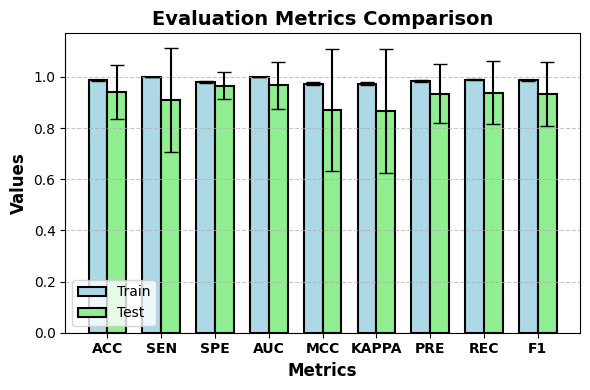

In [ ]:
import matplotlib.pyplot as plt

metric_labels = {
    'accuracy': 'ACC',
    'sensitivity': 'SEN',
    'specificity': 'SPE',
    'auc': 'AUC',
    'mcc': 'MCC',
    'kappa': 'KAPPA',
    'precision': 'PRE',
    'recall': 'REC',
    'f1': 'F1'
}

# Extracting mean values and standard deviations from the results
metrics = ['accuracy', 'sensitivity', 'specificity', 'auc', 'mcc', 'kappa', 'precision', 'recall', 'f1']
train_means = [results[f'train_{metric}_mean'] for metric in metrics]
train_stds = [results[f'train_{metric}_std'] for metric in metrics]
test_means = [results[f'test_{metric}_mean'] for metric in metrics]
test_stds = [results[f'test_{metric}_std'] for metric in metrics]

# Define colors for train and test bars
train_color = 'lightblue'
test_color = 'lightgreen'

# Plotting bar plots for each metric
plt.figure(figsize=(6, 4))
x = range(len(metrics))
width = 0.35

plt.bar(x, train_means, width, label='Train', yerr=train_stds, capsize=5, color=train_color, edgecolor='black', linewidth=1.5)
plt.bar([i + width for i in x], test_means, width, label='Test', yerr=test_stds, capsize=5, color=test_color, edgecolor='black', linewidth=1.5)

plt.xlabel('Metrics', fontsize=12, fontweight='bold')  # Set x-axis label properties
plt.ylabel('Values', fontsize=12, fontweight='bold')   # Set y-axis label properties
plt.title('Evaluation Metrics Comparison', fontsize=14, fontweight='bold')  # Set title properties

# Set x-axis tick labels using the abbreviated names
plt.xticks([i + width/2 for i in x], [metric_labels[metric] for metric in metrics], fontsize=10, fontweight='bold')

plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:


model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Assuming model1 has a plot method that visualizes decision boundaries
model1.plot(beta=100, scale=1, data=iris_dataset['train_input'])


AttributeError: 'KAN' object has no attribute 'plot'

# AAC

In [ ]:
class KAN(torch.nn.Module):
    def __init__(self, width, device):
        super(KAN, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(width[0], width[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(width[1], width[2])
        )
        self.device = device
        self.to(device)

    def forward(self, x):
        return self.layers(x)

In [14]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import StandardScaler


model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')

def train_model1(train_loader, criterion, optimizer, device):
    model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
    model1.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model1(model1, dataset, device):
    def to_cpu(tensor):
        return tensor.detach().cpu().numpy()

    def accuracy(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return (preds == labels).float().mean().item()

    def sensitivity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tp / (tp + fn)

    def specificity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tn / (tn + fp)

    def auc_score(outputs, labels):
        preds = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        return roc_auc_score(labels.cpu(), preds.cpu())

    def mcc_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return matthews_corrcoef(labels.cpu(), preds.cpu())

    def kappa_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return cohen_kappa_score(labels.cpu(), preds.cpu())

    def precision(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return precision_score(labels.cpu(), preds.cpu(), average='macro')

    def recall(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return recall_score(labels.cpu(), preds.cpu(), average='macro')

    def f1(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return f1_score(labels.cpu(), preds.cpu(), average='macro')

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'auc': auc_score,
        'mcc': mcc_score,
        'kappa': kappa_score,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    results = {f'train_{k}_list': [] for k in metrics.keys()}
    results.update({f'test_{k}_list': [] for k in metrics.keys()})

    for fold_data in dataset['folds']:
        train_inputs, train_labels = fold_data['train_input'], fold_data['train_label']
        test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']

        # Prepare data loaders
        train_dataset = TensorDataset(train_inputs, train_labels)
        test_dataset = TensorDataset(test_inputs, test_labels)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Define criterion and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

        # Train the model1
        for epoch in range(400):  # Adjust the number of epochs as needed

            train_model1(train_loader, criterion, optimizer,device)

        # Evaluate on training and testing data
        model1.eval()
        with torch.no_grad():
            train_outputs = model1(train_inputs.to(device))
            test_outputs = model1(test_inputs.to(device))

        for metric_name, metric_func in metrics.items():
            train_metric_value = metric_func(train_outputs, train_labels.to(device))
            test_metric_value = metric_func(test_outputs, test_labels.to(device))
            results[f'train_{metric_name}_list'].append(train_metric_value)
            results[f'test_{metric_name}_list'].append(test_metric_value)

    # Calculate mean and standard deviation of metrics
    summary_results = {}
    for metric_name in metrics.keys():
        summary_results[f'train_{metric_name}_mean'] = np.mean(results[f'train_{metric_name}_list'])
        summary_results[f'train_{metric_name}_std'] = np.std(results[f'train_{metric_name}_list'])
        summary_results[f'test_{metric_name}_mean'] = np.mean(results[f'test_{metric_name}_list'])
        summary_results[f'test_{metric_name}_std'] = np.std(results[f'test_{metric_name}_list'])

    return summary_results

# Assuming df_AAC is your DataFrame containing the Iris dataset
def load_iris_dataset(df_AAC):
    # Add your logic to load and preprocess the Iris dataset
    # Convert the DataFrame to TensorDataset
    X = df_AAC.iloc[:, :-1].values
    y = df_AAC.iloc[:, -1].values
    X = StandardScaler().fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Create K-Folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    folds = []
    for train_idx, test_idx in kfold.split(X):
        folds.append({
            'train_input': X[train_idx],
            'train_label': y[train_idx],
            'test_input': X[test_idx],
            'test_label': y[test_idx]
        })
    return {'folds': folds}

iris_dataset = load_iris_dataset(df_AAC)  # Ensure load_iris_dataset function is defined and used correctly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')

results = evaluate_model1(model1, iris_dataset, device)
print("Train Accuracy: {:.4f} ± {:.4f}".format(results['train_accuracy_mean'], results['train_accuracy_std']))
print("Test Accuracy: {:.4f} ± {:.4f}".format(results['test_accuracy_mean'], results['test_accuracy_std']))
print("Train Sensitivity: {:.4f} ± {:.4f}".format(results['train_sensitivity_mean'], results['train_sensitivity_std']))
print("Test Sensitivity: {:.4f} ± {:.4f}".format(results['test_sensitivity_mean'], results['test_sensitivity_std']))
print("Train Specificity: {:.4f} ± {:.4f}".format(results['train_specificity_mean'], results['train_specificity_std']))
print("Test Specificity: {:.4f} ± {:.4f}".format(results['test_specificity_mean'], results['test_specificity_std']))
print("Train AUC: {:.4f} ± {:.4f}".format(results['train_auc_mean'], results['train_auc_std']))
print("Test AUC: {:.4f} ± {:.4f}".format(results['test_auc_mean'], results['test_auc_std']))
print("Train MCC: {:.4f} ± {:.4f}".format(results['train_mcc_mean'], results['train_mcc_std']))
print("Test MCC: {:.4f} ± {:.4f}".format(results['test_mcc_mean'], results['test_mcc_std']))
print("Train Kappa: {:.4f} ± {:.4f}".format(results['train_kappa_mean'], results['train_kappa_std']))
print("Test Kappa: {:.4f} ± {:.4f}".format(results['test_kappa_mean'], results['test_kappa_std']))
print("Train Precision: {:.4f} ± {:.4f}".format(results['train_precision_mean'], results['train_precision_std']))
print("Test Precision: {:.4f} ± {:.4f}".format(results['test_precision_mean'], results['test_precision_std']))
print("Train Recall: {:.4f} ± {:.4f}".format(results['train_recall_mean'], results['train_recall_std']))
print("Test Recall: {:.4f} ± {:.4f}".format(results['test_recall_mean'], results['test_recall_std']))
print("Train F1 Score: {:.4f} ± {:.4f}".format(results['train_f1_mean'], results['train_f1_std']))
print("Test F1 Score: {:.4f} ± {:.4f}".format(results['test_f1_mean'], results['test_f1_std']))


TypeError: KAN.train() missing 1 required positional argument: 'dataset'

## visualization

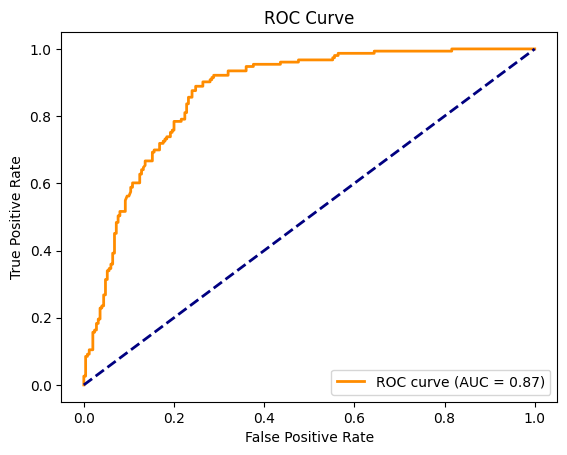

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming `KAN` model1 is defined somewhere and instantiated correctly
model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')

# Define the KAN class and training functions here...

def evaluate_model1_roc(model1, dataset, device):
    all_labels = []
    all_preds = []

    for fold_data in dataset['folds']:
        train_inputs, train_labels = fold_data['train_input'], fold_data['train_label']
        test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']

        # Prepare data loaders
        train_dataset = TensorDataset(train_inputs, train_labels)
        test_dataset = TensorDataset(test_inputs, test_labels)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Define criterion and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

        # Train the model1
        for epoch in range(400):  # Adjust the number of epochs as needed
            train_model1(model1, train_loader, criterion, optimizer, device)

        # Evaluate on testing data
        model1.eval()
        with torch.no_grad():
            test_outputs = model1(test_inputs.to(device))

        # Calculate ROC curve and AUC
        preds = torch.nn.functional.softmax(test_outputs, dim=1)[:, 1]
        all_labels.extend(test_labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    fpr, tpr, _ = roc_curve(all_labels, all_preds)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming df_AAC is your DataFrame containing the Iris dataset
def load_iris_dataset(df_AAC):
    # Add your logic to load and preprocess the Iris dataset
    # Convert the DataFrame to TensorDataset
    X = df_AAC.iloc[:, :-1].values
    y = df_AAC.iloc[:, -1].values
    X = StandardScaler().fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Create K-Folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    folds = []
    for train_idx, test_idx in kfold.split(X):
        folds.append({
            'train_input': X[train_idx],
            'train_label': y[train_idx],
            'test_input': X[test_idx],
            'test_label': y[test_idx]
        })
    return {'folds': folds}

iris_dataset = load_iris_dataset(df_AAC)  # Ensure load_iris_dataset function is defined and used correctly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

evaluate_model1_roc(model1, iris_dataset, device)


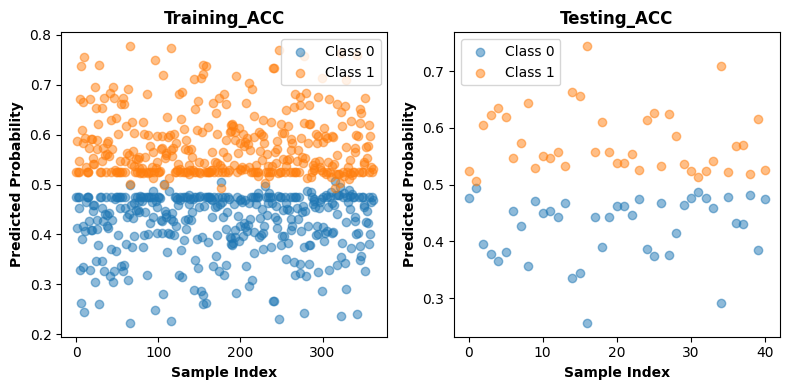

In [ ]:
def plot_predicted_probabilities(model, inputs, labels, device, dataset_type, ax):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs.to(device))

    probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()

    # Plotting predicted probabilities
    for class_idx in range(probabilities.shape[1]):
        ax.scatter(range(len(true_labels)), probabilities[:, class_idx], label=f'Class {class_idx}', alpha=0.5)
    ax.set_xlabel('Sample Index',fontweight='bold')
    ax.set_ylabel('Predicted Probability',fontweight='bold')
    ax.set_title( f'{dataset_type}''_ACC', fontweight='bold')
    ax.legend()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot predicted probabilities for training set
plot_predicted_probabilities(model1, iris_dataset['folds'][0]['train_input'], iris_dataset['folds'][0]['train_label'], device, 'Training', axs[0])

# Plot predicted probabilities for testing set
plot_predicted_probabilities(model1, iris_dataset['folds'][0]['test_input'], iris_dataset['folds'][0]['test_label'], device, 'Testing', axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


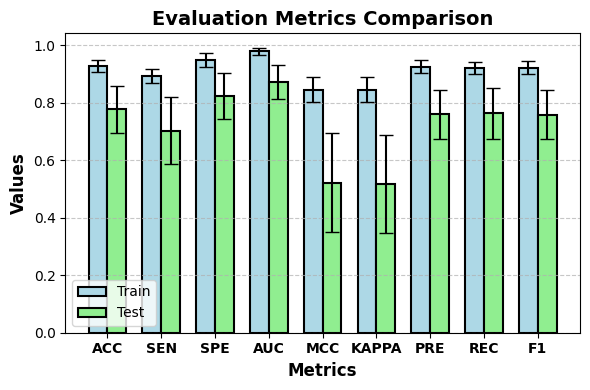

In [ ]:
import matplotlib.pyplot as plt

metric_labels = {
    'accuracy': 'ACC',
    'sensitivity': 'SEN',
    'specificity': 'SPE',
    'auc': 'AUC',
    'mcc': 'MCC',
    'kappa': 'KAPPA',
    'precision': 'PRE',
    'recall': 'REC',
    'f1': 'F1'
}

# Extracting mean values and standard deviations from the results
metrics = ['accuracy', 'sensitivity', 'specificity', 'auc', 'mcc', 'kappa', 'precision', 'recall', 'f1']
train_means = [results[f'train_{metric}_mean'] for metric in metrics]
train_stds = [results[f'train_{metric}_std'] for metric in metrics]
test_means = [results[f'test_{metric}_mean'] for metric in metrics]
test_stds = [results[f'test_{metric}_std'] for metric in metrics]

# Define colors for train and test bars
train_color = 'lightblue'
test_color = 'lightgreen'

# Plotting bar plots for each metric
plt.figure(figsize=(6, 4))
x = range(len(metrics))
width = 0.35

plt.bar(x, train_means, width, label='Train', yerr=train_stds, capsize=5, color=train_color, edgecolor='black', linewidth=1.5)
plt.bar([i + width for i in x], test_means, width, label='Test', yerr=test_stds, capsize=5, color=test_color, edgecolor='black', linewidth=1.5)

plt.xlabel('Metrics', fontsize=12, fontweight='bold')  # Set x-axis label properties
plt.ylabel('Values', fontsize=12, fontweight='bold')   # Set y-axis label properties
plt.title('Evaluation Metrics Comparison', fontsize=14, fontweight='bold')  # Set title properties

# Set x-axis tick labels using the abbreviated names
plt.xticks([i + width/2 for i in x], [metric_labels[metric] for metric in metrics], fontsize=10, fontweight='bold')

plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:


model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Assuming model1 has a plot method that visualizes decision boundaries
model1.plot(beta=100, scale=1, data=iris_dataset['train_input'])


AttributeError: 'KAN' object has no attribute 'plot'

# blosume

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import StandardScaler


# Assuming `KAN` model2 is defined somewhere and instantiated correctly
model2 = KAN(width=[620, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Dummy model2 class for demonstration; replace with your actual model2
class KAN(torch.nn.Module):
    def __init__(self, width, device):
        super(KAN, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(width[0], width[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(width[1], width[2])
        )
        self.device = device
        self.to(device)

    def forward(self, x):
        return self.layers(x)

def train_model2(model2, train_loader, criterion, optimizer, device):
    model2.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model2(model2, dataset, device):
    def to_cpu(tensor):
        return tensor.detach().cpu().numpy()

    def accuracy(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return (preds == labels).float().mean().item()

    def sensitivity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tp / (tp + fn)

    def specificity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tn / (tn + fp)

    def auc_score(outputs, labels):
        preds = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        return roc_auc_score(labels.cpu(), preds.cpu())

    def mcc_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return matthews_corrcoef(labels.cpu(), preds.cpu())

    def kappa_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return cohen_kappa_score(labels.cpu(), preds.cpu())

    def precision(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return precision_score(labels.cpu(), preds.cpu(), average='macro')

    def recall(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return recall_score(labels.cpu(), preds.cpu(), average='macro')

    def f1(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return f1_score(labels.cpu(), preds.cpu(), average='macro')

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'auc': auc_score,
        'mcc': mcc_score,
        'kappa': kappa_score,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    results = {f'train_{k}_list': [] for k in metrics.keys()}
    results.update({f'test_{k}_list': [] for k in metrics.keys()})

    for fold_data in dataset['folds']:
        train_inputs, train_labels = fold_data['train_input'], fold_data['train_label']
        test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']

        # Prepare data loaders
        train_dataset = TensorDataset(train_inputs, train_labels)
        test_dataset = TensorDataset(test_inputs, test_labels)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Define criterion and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

        # Train the model2
        for epoch in range(400):  # Adjust the number of epochs as needed
            train_model2(model2, train_loader, criterion, optimizer, device)

        # Evaluate on training and testing data
        model2.eval()
        with torch.no_grad():
            train_outputs = model2(train_inputs.to(device))
            test_outputs = model2(test_inputs.to(device))

        for metric_name, metric_func in metrics.items():
            train_metric_value = metric_func(train_outputs, train_labels.to(device))
            test_metric_value = metric_func(test_outputs, test_labels.to(device))
            results[f'train_{metric_name}_list'].append(train_metric_value)
            results[f'test_{metric_name}_list'].append(test_metric_value)

    # Calculate mean and standard deviation of metrics
    summary_results = {}
    for metric_name in metrics.keys():
        summary_results[f'train_{metric_name}_mean'] = np.mean(results[f'train_{metric_name}_list'])
        summary_results[f'train_{metric_name}_std'] = np.std(results[f'train_{metric_name}_list'])
        summary_results[f'test_{metric_name}_mean'] = np.mean(results[f'test_{metric_name}_list'])
        summary_results[f'test_{metric_name}_std'] = np.std(results[f'test_{metric_name}_list'])

    return summary_results

# Assuming df_Blosume is your DataFrame containing the Iris dataset
def load_iris_dataset(df_Blosume):
    # Add your logic to load and preprocess the Iris dataset
    # Convert the DataFrame to TensorDataset
    X = df_Blosume.iloc[:, :-1].values
    y = df_Blosume.iloc[:, -1].values
    X = StandardScaler().fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Create K-Folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    folds = []
    for train_idx, test_idx in kfold.split(X):
        folds.append({
            'train_input': X[train_idx],
            'train_label': y[train_idx],
            'test_input': X[test_idx],
            'test_label': y[test_idx]
        })
    return {'folds': folds}

iris_dataset = load_iris_dataset(df_Blosume)  # Ensure load_iris_dataset function is defined and used correctly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

results = evaluate_model2(model2, iris_dataset, device)
print("Train Accuracy: {:.4f} ± {:.4f}".format(results['train_accuracy_mean'], results['train_accuracy_std']))
print("Test Accuracy: {:.4f} ± {:.4f}".format(results['test_accuracy_mean'], results['test_accuracy_std']))
print("Train Sensitivity: {:.4f} ± {:.4f}".format(results['train_sensitivity_mean'], results['train_sensitivity_std']))
print("Test Sensitivity: {:.4f} ± {:.4f}".format(results['test_sensitivity_mean'], results['test_sensitivity_std']))
print("Train Specificity: {:.4f} ± {:.4f}".format(results['train_specificity_mean'], results['train_specificity_std']))
print("Test Specificity: {:.4f} ± {:.4f}".format(results['test_specificity_mean'], results['test_specificity_std']))
print("Train AUC: {:.4f} ± {:.4f}".format(results['train_auc_mean'], results['train_auc_std']))
print("Test AUC: {:.4f} ± {:.4f}".format(results['test_auc_mean'], results['test_auc_std']))
print("Train MCC: {:.4f} ± {:.4f}".format(results['train_mcc_mean'], results['train_mcc_std']))
print("Test MCC: {:.4f} ± {:.4f}".format(results['test_mcc_mean'], results['test_mcc_std']))
print("Train Kappa: {:.4f} ± {:.4f}".format(results['train_kappa_mean'], results['train_kappa_std']))
print("Test Kappa: {:.4f} ± {:.4f}".format(results['test_kappa_mean'], results['test_kappa_std']))
print("Train Precision: {:.4f} ± {:.4f}".format(results['train_precision_mean'], results['train_precision_std']))
print("Test Precision: {:.4f} ± {:.4f}".format(results['test_precision_mean'], results['test_precision_std']))
print("Train Recall: {:.4f} ± {:.4f}".format(results['train_recall_mean'], results['train_recall_std']))
print("Test Recall: {:.4f} ± {:.4f}".format(results['test_recall_mean'], results['test_recall_std']))
print("Train F1 Score: {:.4f} ± {:.4f}".format(results['train_f1_mean'], results['train_f1_std']))
print("Test F1 Score: {:.4f} ± {:.4f}".format(results['test_f1_mean'], results['test_f1_std']))


Train Accuracy: 0.9796 ± 0.0036
Test Accuracy: 0.9410 ± 0.0809
Train Sensitivity: 0.9749 ± 0.0312
Test Sensitivity: 0.9252 ± 0.1147
Train Specificity: 0.9822 ± 0.0148
Test Specificity: 0.9521 ± 0.0746
Train AUC: 0.9989 ± 0.0004
Test AUC: 0.9666 ± 0.0923
Train MCC: 0.9575 ± 0.0078
Test MCC: 0.8771 ± 0.1693
Train Kappa: 0.9566 ± 0.0082
Test Kappa: 0.8742 ± 0.1693
Train Precision: 0.9790 ± 0.0034
Test Precision: 0.9387 ± 0.0844
Train Recall: 0.9786 ± 0.0087
Test Recall: 0.9386 ± 0.0859
Train F1 Score: 0.9783 ± 0.0041
Test F1 Score: 0.9370 ± 0.0846


## visualization

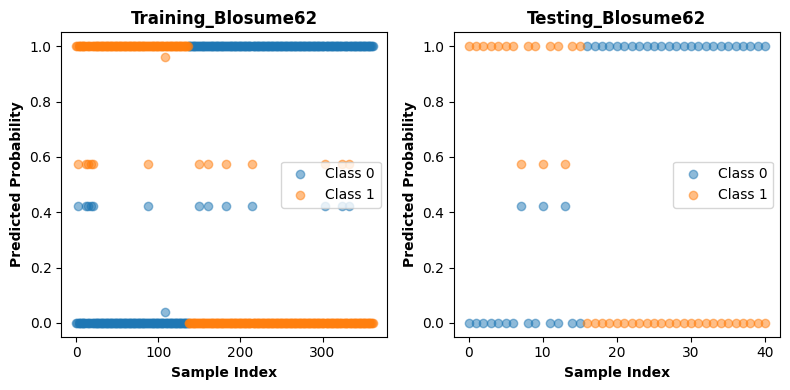

In [ ]:
def plot_predicted_probabilities(model, inputs, labels, device, dataset_type, ax):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs.to(device))

    probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()

    # Plotting predicted probabilities
    for class_idx in range(probabilities.shape[1]):
        ax.scatter(range(len(true_labels)), probabilities[:, class_idx], label=f'Class {class_idx}', alpha=0.5)
    ax.set_xlabel('Sample Index',fontweight='bold')
    ax.set_ylabel('Predicted Probability',fontweight='bold')
    ax.set_title( f'{dataset_type}''_Blosume62', fontweight='bold')
    ax.legend()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot predicted probabilities for training set
plot_predicted_probabilities(model2, iris_dataset['folds'][0]['train_input'], iris_dataset['folds'][0]['train_label'], device, 'Training', axs[0])

# Plot predicted probabilities for testing set
plot_predicted_probabilities(model2, iris_dataset['folds'][0]['test_input'], iris_dataset['folds'][0]['test_label'], device, 'Testing', axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


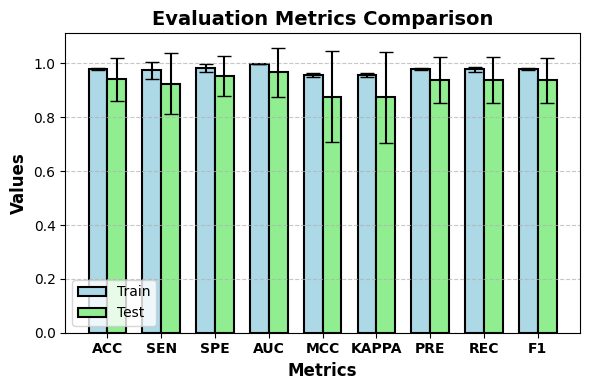

In [ ]:
import matplotlib.pyplot as plt

metric_labels = {
    'accuracy': 'ACC',
    'sensitivity': 'SEN',
    'specificity': 'SPE',
    'auc': 'AUC',
    'mcc': 'MCC',
    'kappa': 'KAPPA',
    'precision': 'PRE',
    'recall': 'REC',
    'f1': 'F1'
}

# Extracting mean values and standard deviations from the results
metrics = ['accuracy', 'sensitivity', 'specificity', 'auc', 'mcc', 'kappa', 'precision', 'recall', 'f1']
train_means = [results[f'train_{metric}_mean'] for metric in metrics]
train_stds = [results[f'train_{metric}_std'] for metric in metrics]
test_means = [results[f'test_{metric}_mean'] for metric in metrics]
test_stds = [results[f'test_{metric}_std'] for metric in metrics]

# Define colors for train and test bars
train_color = 'lightblue'
test_color = 'lightgreen'

# Plotting bar plots for each metric
plt.figure(figsize=(6, 4))
x = range(len(metrics))
width = 0.35

plt.bar(x, train_means, width, label='Train', yerr=train_stds, capsize=5, color=train_color, edgecolor='black', linewidth=1.5)
plt.bar([i + width for i in x], test_means, width, label='Test', yerr=test_stds, capsize=5, color=test_color, edgecolor='black', linewidth=1.5)

plt.xlabel('Metrics', fontsize=12, fontweight='bold')  # Set x-axis label properties
plt.ylabel('Values', fontsize=12, fontweight='bold')   # Set y-axis label properties
plt.title('Evaluation Metrics Comparison', fontsize=14, fontweight='bold')  # Set title properties

# Set x-axis tick labels using the abbreviated names
plt.xticks([i + width/2 for i in x], [metric_labels[metric] for metric in metrics], fontsize=10, fontweight='bold')

plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:


model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Assuming model1 has a plot method that visualizes decision boundaries
model1.plot(beta=100, scale=1, data=iris_dataset['train_input'])


AttributeError: 'KAN' object has no attribute 'plot'

# OPF

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import StandardScaler


# Assuming `KAN` model3 is defined somewhere and instantiated correctly
model3 = KAN(width=[310, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Dummy model3 class for demonstration; replace with your actual model3
class KAN(torch.nn.Module):
    def __init__(self, width, device):
        super(KAN, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(width[0], width[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(width[1], width[2])
        )
        self.device = device
        self.to(device)

    def forward(self, x):
        return self.layers(x)

def train_model3(model3, train_loader, criterion, optimizer, device):
    model3.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model3(model3, dataset, device):
    def to_cpu(tensor):
        return tensor.detach().cpu().numpy()

    def accuracy(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return (preds == labels).float().mean().item()

    def sensitivity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tp / (tp + fn)

    def specificity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tn / (tn + fp)

    def auc_score(outputs, labels):
        preds = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        return roc_auc_score(labels.cpu(), preds.cpu())

    def mcc_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return matthews_corrcoef(labels.cpu(), preds.cpu())

    def kappa_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return cohen_kappa_score(labels.cpu(), preds.cpu())

    def precision(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return precision_score(labels.cpu(), preds.cpu(), average='macro')

    def recall(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return recall_score(labels.cpu(), preds.cpu(), average='macro')

    def f1(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return f1_score(labels.cpu(), preds.cpu(), average='macro')

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'auc': auc_score,
        'mcc': mcc_score,
        'kappa': kappa_score,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    results = {f'train_{k}_list': [] for k in metrics.keys()}
    results.update({f'test_{k}_list': [] for k in metrics.keys()})

    for fold_data in dataset['folds']:
        train_inputs, train_labels = fold_data['train_input'], fold_data['train_label']
        test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']

        # Prepare data loaders
        train_dataset = TensorDataset(train_inputs, train_labels)
        test_dataset = TensorDataset(test_inputs, test_labels)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Define criterion and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)

        # Train the model3
        for epoch in range(400):  # Adjust the number of epochs as needed
            train_model3(model3, train_loader, criterion, optimizer, device)

        # Evaluate on training and testing data
        model3.eval()
        with torch.no_grad():
            train_outputs = model3(train_inputs.to(device))
            test_outputs = model3(test_inputs.to(device))

        for metric_name, metric_func in metrics.items():
            train_metric_value = metric_func(train_outputs, train_labels.to(device))
            test_metric_value = metric_func(test_outputs, test_labels.to(device))
            results[f'train_{metric_name}_list'].append(train_metric_value)
            results[f'test_{metric_name}_list'].append(test_metric_value)

    # Calculate mean and standard deviation of metrics
    summary_results = {}
    for metric_name in metrics.keys():
        summary_results[f'train_{metric_name}_mean'] = np.mean(results[f'train_{metric_name}_list'])
        summary_results[f'train_{metric_name}_std'] = np.std(results[f'train_{metric_name}_list'])
        summary_results[f'test_{metric_name}_mean'] = np.mean(results[f'test_{metric_name}_list'])
        summary_results[f'test_{metric_name}_std'] = np.std(results[f'test_{metric_name}_list'])

    return summary_results

# Assuming df_OPF is your DataFrame containing the Iris dataset
def load_iris_dataset(df_OPF):
    # Add your logic to load and preprocess the Iris dataset
    # Convert the DataFrame to TensorDataset
    X = df_OPF.iloc[:, :-1].values
    y = df_OPF.iloc[:, -1].values
    X = StandardScaler().fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Create K-Folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    folds = []
    for train_idx, test_idx in kfold.split(X):
        folds.append({
            'train_input': X[train_idx],
            'train_label': y[train_idx],
            'test_input': X[test_idx],
            'test_label': y[test_idx]
        })
    return {'folds': folds}

iris_dataset = load_iris_dataset(df_OPF)  # Ensure load_iris_dataset function is defined and used correctly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

results = evaluate_model3(model3, iris_dataset, device)
print("Train Accuracy: {:.4f} ± {:.4f}".format(results['train_accuracy_mean'], results['train_accuracy_std']))
print("Test Accuracy: {:.4f} ± {:.4f}".format(results['test_accuracy_mean'], results['test_accuracy_std']))
print("Train Sensitivity: {:.4f} ± {:.4f}".format(results['train_sensitivity_mean'], results['train_sensitivity_std']))
print("Test Sensitivity: {:.4f} ± {:.4f}".format(results['test_sensitivity_mean'], results['test_sensitivity_std']))
print("Train Specificity: {:.4f} ± {:.4f}".format(results['train_specificity_mean'], results['train_specificity_std']))
print("Test Specificity: {:.4f} ± {:.4f}".format(results['test_specificity_mean'], results['test_specificity_std']))
print("Train AUC: {:.4f} ± {:.4f}".format(results['train_auc_mean'], results['train_auc_std']))
print("Test AUC: {:.4f} ± {:.4f}".format(results['test_auc_mean'], results['test_auc_std']))
print("Train MCC: {:.4f} ± {:.4f}".format(results['train_mcc_mean'], results['train_mcc_std']))
print("Test MCC: {:.4f} ± {:.4f}".format(results['test_mcc_mean'], results['test_mcc_std']))
print("Train Kappa: {:.4f} ± {:.4f}".format(results['train_kappa_mean'], results['train_kappa_std']))
print("Test Kappa: {:.4f} ± {:.4f}".format(results['test_kappa_mean'], results['test_kappa_std']))
print("Train Precision: {:.4f} ± {:.4f}".format(results['train_precision_mean'], results['train_precision_std']))
print("Test Precision: {:.4f} ± {:.4f}".format(results['test_precision_mean'], results['test_precision_std']))
print("Train Recall: {:.4f} ± {:.4f}".format(results['train_recall_mean'], results['train_recall_std']))
print("Test Recall: {:.4f} ± {:.4f}".format(results['test_recall_mean'], results['test_recall_std']))
print("Train F1 Score: {:.4f} ± {:.4f}".format(results['train_f1_mean'], results['train_f1_std']))
print("Test F1 Score: {:.4f} ± {:.4f}".format(results['test_f1_mean'], results['test_f1_std']))


Train Accuracy: 0.9926 ± 0.0013
Test Accuracy: 0.9582 ± 0.0787
Train Sensitivity: 1.0000 ± 0.0000
Test Sensitivity: 0.9460 ± 0.1129
Train Specificity: 0.9880 ± 0.0020
Test Specificity: 0.9682 ± 0.0588
Train AUC: 0.9990 ± 0.0002
Test AUC: 0.9767 ± 0.0656
Train MCC: 0.9844 ± 0.0027
Test MCC: 0.9120 ± 0.1670
Train Kappa: 0.9842 ± 0.0027
Test Kappa: 0.9114 ± 0.1671
Train Precision: 0.9904 ± 0.0017
Test Precision: 0.9549 ± 0.0823
Train Recall: 0.9940 ± 0.0010
Test Recall: 0.9571 ± 0.0849
Train F1 Score: 0.9921 ± 0.0013
Test F1 Score: 0.9557 ± 0.0836


## visualization

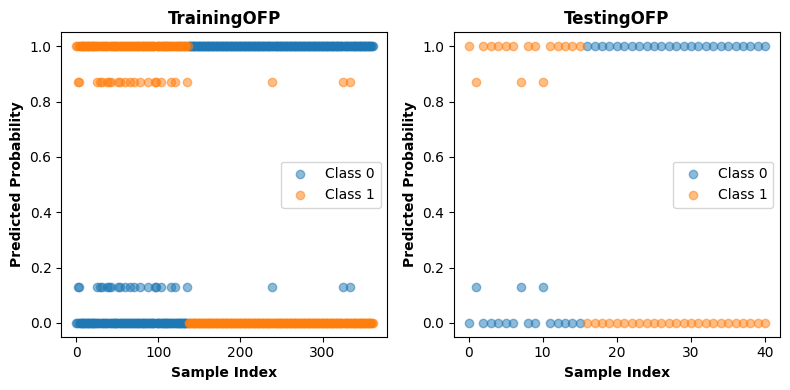

In [ ]:
def plot_predicted_probabilities(model, inputs, labels, device, dataset_type, ax):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs.to(device))

    probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()

    # Plotting predicted probabilities
    for class_idx in range(probabilities.shape[1]):
        ax.scatter(range(len(true_labels)), probabilities[:, class_idx], label=f'Class {class_idx}', alpha=0.5)
    ax.set_xlabel('Sample Index',fontweight='bold')
    ax.set_ylabel('Predicted Probability',fontweight='bold')
    ax.set_title( f'{dataset_type}''OFP', fontweight='bold')
    ax.legend()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot predicted probabilities for training set
plot_predicted_probabilities(model3, iris_dataset['folds'][0]['train_input'], iris_dataset['folds'][0]['train_label'], device, 'Training', axs[0])

# Plot predicted probabilities for testing set
plot_predicted_probabilities(model3, iris_dataset['folds'][0]['test_input'], iris_dataset['folds'][0]['test_label'], device, 'Testing', axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


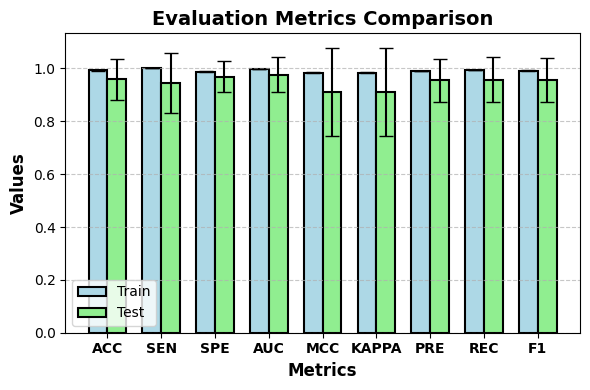

In [ ]:
import matplotlib.pyplot as plt

metric_labels = {
    'accuracy': 'ACC',
    'sensitivity': 'SEN',
    'specificity': 'SPE',
    'auc': 'AUC',
    'mcc': 'MCC',
    'kappa': 'KAPPA',
    'precision': 'PRE',
    'recall': 'REC',
    'f1': 'F1'
}

# Extracting mean values and standard deviations from the results
metrics = ['accuracy', 'sensitivity', 'specificity', 'auc', 'mcc', 'kappa', 'precision', 'recall', 'f1']
train_means = [results[f'train_{metric}_mean'] for metric in metrics]
train_stds = [results[f'train_{metric}_std'] for metric in metrics]
test_means = [results[f'test_{metric}_mean'] for metric in metrics]
test_stds = [results[f'test_{metric}_std'] for metric in metrics]

# Define colors for train and test bars
train_color = 'lightblue'
test_color = 'lightgreen'

# Plotting bar plots for each metric
plt.figure(figsize=(6, 4))
x = range(len(metrics))
width = 0.35

plt.bar(x, train_means, width, label='Train', yerr=train_stds, capsize=5, color=train_color, edgecolor='black', linewidth=1.5)
plt.bar([i + width for i in x], test_means, width, label='Test', yerr=test_stds, capsize=5, color=test_color, edgecolor='black', linewidth=1.5)

plt.xlabel('Metrics', fontsize=12, fontweight='bold')  # Set x-axis label properties
plt.ylabel('Values', fontsize=12, fontweight='bold')   # Set y-axis label properties
plt.title('Evaluation Metrics Comparison', fontsize=14, fontweight='bold')  # Set title properties

# Set x-axis tick labels using the abbreviated names
plt.xticks([i + width/2 for i in x], [metric_labels[metric] for metric in metrics], fontsize=10, fontweight='bold')

plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:


model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Assuming model1 has a plot method that visualizes decision boundaries
model1.plot(beta=100, scale=1, data=iris_dataset['train_input'])


AttributeError: 'KAN' object has no attribute 'plot'

# AESNN3

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import StandardScaler


# Assuming `KAN` model4 is defined somewhere and instantiated correctly
model4 = KAN(width=[93, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Dummy model4 class for demonstration; replace with your actual model4
class KAN(torch.nn.Module):
    def __init__(self, width, device):
        super(KAN, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(width[0], width[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(width[1], width[2])
        )
        self.device = device
        self.to(device)

    def forward(self, x):
        return self.layers(x)

def train_model4(model4, train_loader, criterion, optimizer, device):
    model4.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model4(model4, dataset, device):
    def to_cpu(tensor):
        return tensor.detach().cpu().numpy()

    def accuracy(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return (preds == labels).float().mean().item()

    def sensitivity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tp / (tp + fn)

    def specificity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tn / (tn + fp)

    def auc_score(outputs, labels):
        preds = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        return roc_auc_score(labels.cpu(), preds.cpu())

    def mcc_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return matthews_corrcoef(labels.cpu(), preds.cpu())

    def kappa_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return cohen_kappa_score(labels.cpu(), preds.cpu())

    def precision(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return precision_score(labels.cpu(), preds.cpu(), average='macro')

    def recall(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return recall_score(labels.cpu(), preds.cpu(), average='macro')

    def f1(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return f1_score(labels.cpu(), preds.cpu(), average='macro')

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'auc': auc_score,
        'mcc': mcc_score,
        'kappa': kappa_score,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    results = {f'train_{k}_list': [] for k in metrics.keys()}
    results.update({f'test_{k}_list': [] for k in metrics.keys()})

    for fold_data in dataset['folds']:
        train_inputs, train_labels = fold_data['train_input'], fold_data['train_label']
        test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']

        # Prepare data loaders
        train_dataset = TensorDataset(train_inputs, train_labels)
        test_dataset = TensorDataset(test_inputs, test_labels)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Define criterion and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model4.parameters(), lr=0.001)

        # Train the model4
        for epoch in range(400):  # Adjust the number of epochs as needed
            train_model4(model4, train_loader, criterion, optimizer, device)

        # Evaluate on training and testing data
        model4.eval()
        with torch.no_grad():
            train_outputs = model4(train_inputs.to(device))
            test_outputs = model4(test_inputs.to(device))

        for metric_name, metric_func in metrics.items():
            train_metric_value = metric_func(train_outputs, train_labels.to(device))
            test_metric_value = metric_func(test_outputs, test_labels.to(device))
            results[f'train_{metric_name}_list'].append(train_metric_value)
            results[f'test_{metric_name}_list'].append(test_metric_value)

    # Calculate mean and standard deviation of metrics
    summary_results = {}
    for metric_name in metrics.keys():
        summary_results[f'train_{metric_name}_mean'] = np.mean(results[f'train_{metric_name}_list'])
        summary_results[f'train_{metric_name}_std'] = np.std(results[f'train_{metric_name}_list'])
        summary_results[f'test_{metric_name}_mean'] = np.mean(results[f'test_{metric_name}_list'])
        summary_results[f'test_{metric_name}_std'] = np.std(results[f'test_{metric_name}_list'])

    return summary_results

# Assuming df_AESNN is your DataFrame containing the Iris dataset
def load_iris_dataset(df_AESNN):
    # Add your logic to load and preprocess the Iris dataset
    # Convert the DataFrame to TensorDataset
    X = df_AESNN.iloc[:, :-1].values
    y = df_AESNN.iloc[:, -1].values
    X = StandardScaler().fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Create K-Folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    folds = []
    for train_idx, test_idx in kfold.split(X):
        folds.append({
            'train_input': X[train_idx],
            'train_label': y[train_idx],
            'test_input': X[test_idx],
            'test_label': y[test_idx]
        })
    return {'folds': folds}

iris_dataset = load_iris_dataset(df_AESNN)  # Ensure load_iris_dataset function is defined and used correctly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

results = evaluate_model4(model4, iris_dataset, device)
print("Train Accuracy: {:.4f} ± {:.4f}".format(results['train_accuracy_mean'], results['train_accuracy_std']))
print("Test Accuracy: {:.4f} ± {:.4f}".format(results['test_accuracy_mean'], results['test_accuracy_std']))
print("Train Sensitivity: {:.4f} ± {:.4f}".format(results['train_sensitivity_mean'], results['train_sensitivity_std']))
print("Test Sensitivity: {:.4f} ± {:.4f}".format(results['test_sensitivity_mean'], results['test_sensitivity_std']))
print("Train Specificity: {:.4f} ± {:.4f}".format(results['train_specificity_mean'], results['train_specificity_std']))
print("Test Specificity: {:.4f} ± {:.4f}".format(results['test_specificity_mean'], results['test_specificity_std']))
print("Train AUC: {:.4f} ± {:.4f}".format(results['train_auc_mean'], results['train_auc_std']))
print("Test AUC: {:.4f} ± {:.4f}".format(results['test_auc_mean'], results['test_auc_std']))
print("Train MCC: {:.4f} ± {:.4f}".format(results['train_mcc_mean'], results['train_mcc_std']))
print("Test MCC: {:.4f} ± {:.4f}".format(results['test_mcc_mean'], results['test_mcc_std']))
print("Train Kappa: {:.4f} ± {:.4f}".format(results['train_kappa_mean'], results['train_kappa_std']))
print("Test Kappa: {:.4f} ± {:.4f}".format(results['test_kappa_mean'], results['test_kappa_std']))
print("Train Precision: {:.4f} ± {:.4f}".format(results['train_precision_mean'], results['train_precision_std']))
print("Test Precision: {:.4f} ± {:.4f}".format(results['test_precision_mean'], results['test_precision_std']))
print("Train Recall: {:.4f} ± {:.4f}".format(results['train_recall_mean'], results['train_recall_std']))
print("Test Recall: {:.4f} ± {:.4f}".format(results['test_recall_mean'], results['test_recall_std']))
print("Train F1 Score: {:.4f} ± {:.4f}".format(results['train_f1_mean'], results['train_f1_std']))
print("Test F1 Score: {:.4f} ± {:.4f}".format(results['test_f1_mean'], results['test_f1_std']))


Train Accuracy: 0.9923 ± 0.0011
Test Accuracy: 0.9292 ± 0.1428
Train Sensitivity: 1.0000 ± 0.0000
Test Sensitivity: 0.8983 ± 0.2004
Train Specificity: 0.9876 ± 0.0018
Test Specificity: 0.9550 ± 0.1065
Train AUC: 0.9937 ± 0.0008
Test AUC: 0.9477 ± 0.1326
Train MCC: 0.9838 ± 0.0023
Test MCC: 0.8555 ± 0.2993
Train Kappa: 0.9837 ± 0.0023
Test Kappa: 0.8525 ± 0.3013
Train Precision: 0.9900 ± 0.0014
Test Precision: 0.9289 ± 0.1488
Train Recall: 0.9938 ± 0.0009
Test Recall: 0.9266 ± 0.1506
Train F1 Score: 0.9918 ± 0.0012
Test F1 Score: 0.9258 ± 0.1511


## visualization

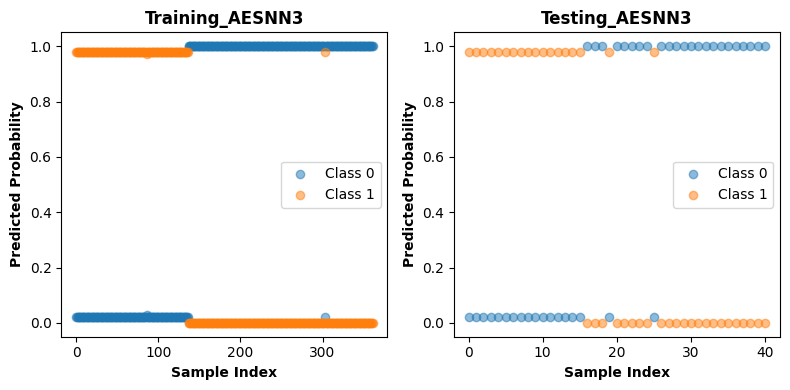

In [ ]:
def plot_predicted_probabilities(model, inputs, labels, device, dataset_type, ax):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs.to(device))

    probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()

    # Plotting predicted probabilities
    for class_idx in range(probabilities.shape[1]):
        ax.scatter(range(len(true_labels)), probabilities[:, class_idx], label=f'Class {class_idx}', alpha=0.5)
    ax.set_xlabel('Sample Index',fontweight='bold')
    ax.set_ylabel('Predicted Probability',fontweight='bold')
    ax.set_title( f'{dataset_type}''_AESNN3', fontweight='bold')
    ax.legend()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot predicted probabilities for training set
plot_predicted_probabilities(model4, iris_dataset['folds'][0]['train_input'], iris_dataset['folds'][0]['train_label'], device, 'Training', axs[0])

# Plot predicted probabilities for testing set
plot_predicted_probabilities(model4, iris_dataset['folds'][0]['test_input'], iris_dataset['folds'][0]['test_label'], device, 'Testing', axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


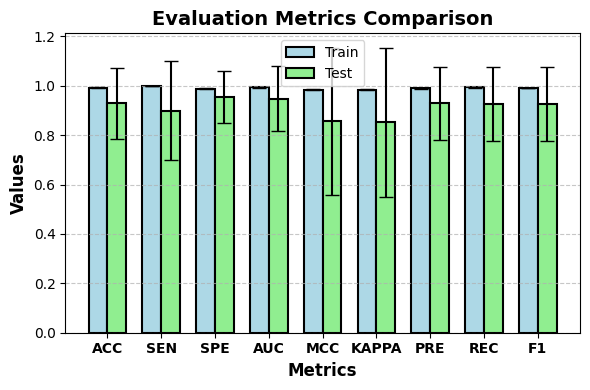

In [ ]:
import matplotlib.pyplot as plt

metric_labels = {
    'accuracy': 'ACC',
    'sensitivity': 'SEN',
    'specificity': 'SPE',
    'auc': 'AUC',
    'mcc': 'MCC',
    'kappa': 'KAPPA',
    'precision': 'PRE',
    'recall': 'REC',
    'f1': 'F1'
}

# Extracting mean values and standard deviations from the results
metrics = ['accuracy', 'sensitivity', 'specificity', 'auc', 'mcc', 'kappa', 'precision', 'recall', 'f1']
train_means = [results[f'train_{metric}_mean'] for metric in metrics]
train_stds = [results[f'train_{metric}_std'] for metric in metrics]
test_means = [results[f'test_{metric}_mean'] for metric in metrics]
test_stds = [results[f'test_{metric}_std'] for metric in metrics]

# Define colors for train and test bars
train_color = 'lightblue'
test_color = 'lightgreen'

# Plotting bar plots for each metric
plt.figure(figsize=(6, 4))
x = range(len(metrics))
width = 0.35

plt.bar(x, train_means, width, label='Train', yerr=train_stds, capsize=5, color=train_color, edgecolor='black', linewidth=1.5)
plt.bar([i + width for i in x], test_means, width, label='Test', yerr=test_stds, capsize=5, color=test_color, edgecolor='black', linewidth=1.5)

plt.xlabel('Metrics', fontsize=12, fontweight='bold')  # Set x-axis label properties
plt.ylabel('Values', fontsize=12, fontweight='bold')   # Set y-axis label properties
plt.title('Evaluation Metrics Comparison', fontsize=14, fontweight='bold')  # Set title properties

# Set x-axis tick labels using the abbreviated names
plt.xticks([i + width/2 for i in x], [metric_labels[metric] for metric in metrics], fontsize=10, fontweight='bold')

plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:


model1 = KAN(width=[20, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Assuming model1 has a plot method that visualizes decision boundaries
model1.plot(beta=100, scale=1, data=iris_dataset['train_input'])


AttributeError: 'KAN' object has no attribute 'plot'

# merged

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import StandardScaler


# Assuming `KAN` model5 is defined somewhere and instantiated correctly
model5 = KAN(width=[1198, 5, 2], device='cuda' if torch.cuda.is_available() else 'cpu')
# Dummy model5 class for demonstration; replace with your actual model5
class KAN(torch.nn.Module):
    def __init__(self, width, device):
        super(KAN, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(width[0], width[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(width[1], width[2])
        )
        self.device = device
        self.to(device)

    def forward(self, x):
        return self.layers(x)

def train_model5(model5, train_loader, criterion, optimizer, device):
    model5.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model5(model5, dataset, device):
    def to_cpu(tensor):
        return tensor.detach().cpu().numpy()

    def accuracy(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return (preds == labels).float().mean().item()

    def sensitivity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tp / (tp + fn)

    def specificity(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        tn, fp, fn, tp = confusion_matrix(labels.cpu(), preds.cpu()).ravel()
        return tn / (tn + fp)

    def auc_score(outputs, labels):
        preds = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        return roc_auc_score(labels.cpu(), preds.cpu())

    def mcc_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return matthews_corrcoef(labels.cpu(), preds.cpu())

    def kappa_score(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return cohen_kappa_score(labels.cpu(), preds.cpu())

    def precision(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return precision_score(labels.cpu(), preds.cpu(), average='macro')

    def recall(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return recall_score(labels.cpu(), preds.cpu(), average='macro')

    def f1(outputs, labels):
        preds = torch.argmax(outputs, dim=1)
        return f1_score(labels.cpu(), preds.cpu(), average='macro')

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'auc': auc_score,
        'mcc': mcc_score,
        'kappa': kappa_score,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    results = {f'train_{k}_list': [] for k in metrics.keys()}
    results.update({f'test_{k}_list': [] for k in metrics.keys()})

    for fold_data in dataset['folds']:
        train_inputs, train_labels = fold_data['train_input'], fold_data['train_label']
        test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']

        # Prepare data loaders
        train_dataset = TensorDataset(train_inputs, train_labels)
        test_dataset = TensorDataset(test_inputs, test_labels)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Define criterion and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model5.parameters(), lr=0.001)

        # Train the model5
        for epoch in range(400):  # Adjust the number of epochs as needed
            train_model5(model5, train_loader, criterion, optimizer, device)

        # Evaluate on training and testing data
        model5.eval()
        with torch.no_grad():
            train_outputs = model5(train_inputs.to(device))
            test_outputs = model5(test_inputs.to(device))

        for metric_name, metric_func in metrics.items():
            train_metric_value = metric_func(train_outputs, train_labels.to(device))
            test_metric_value = metric_func(test_outputs, test_labels.to(device))
            results[f'train_{metric_name}_list'].append(train_metric_value)
            results[f'test_{metric_name}_list'].append(test_metric_value)

    # Calculate mean and standard deviation of metrics
    summary_results = {}
    for metric_name in metrics.keys():
        summary_results[f'train_{metric_name}_mean'] = np.mean(results[f'train_{metric_name}_list'])
        summary_results[f'train_{metric_name}_std'] = np.std(results[f'train_{metric_name}_list'])
        summary_results[f'test_{metric_name}_mean'] = np.mean(results[f'test_{metric_name}_list'])
        summary_results[f'test_{metric_name}_std'] = np.std(results[f'test_{metric_name}_list'])

    return summary_results

# Assuming df_merged is your DataFrame containing the Iris dataset
def load_iris_dataset(df_merged):
    # Add your logic to load and preprocess the Iris dataset
    # Convert the DataFrame to TensorDataset
    X = df_merged.iloc[:, :-1].values
    y = df_merged.iloc[:, -1].values
    X = StandardScaler().fit_transform(X)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Create K-Folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    folds = []
    for train_idx, test_idx in kfold.split(X):
        folds.append({
            'train_input': X[train_idx],
            'train_label': y[train_idx],
            'test_input': X[test_idx],
            'test_label': y[test_idx]
        })
    return {'folds': folds}

iris_dataset = load_iris_dataset(df_merged)  # Ensure load_iris_dataset function is defined and used correctly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

results = evaluate_model5(model5, iris_dataset, device)
print("Train Accuracy: {:.4f} ± {:.4f}".format(results['train_accuracy_mean'], results['train_accuracy_std']))
print("Test Accuracy: {:.4f} ± {:.4f}".format(results['test_accuracy_mean'], results['test_accuracy_std']))
print("Train Sensitivity: {:.4f} ± {:.4f}".format(results['train_sensitivity_mean'], results['train_sensitivity_std']))
print("Test Sensitivity: {:.4f} ± {:.4f}".format(results['test_sensitivity_mean'], results['test_sensitivity_std']))
print("Train Specificity: {:.4f} ± {:.4f}".format(results['train_specificity_mean'], results['train_specificity_std']))
print("Test Specificity: {:.4f} ± {:.4f}".format(results['test_specificity_mean'], results['test_specificity_std']))
print("Train AUC: {:.4f} ± {:.4f}".format(results['train_auc_mean'], results['train_auc_std']))
print("Test AUC: {:.4f} ± {:.4f}".format(results['test_auc_mean'], results['test_auc_std']))
print("Train MCC: {:.4f} ± {:.4f}".format(results['train_mcc_mean'], results['train_mcc_std']))
print("Test MCC: {:.4f} ± {:.4f}".format(results['test_mcc_mean'], results['test_mcc_std']))
print("Train Kappa: {:.4f} ± {:.4f}".format(results['train_kappa_mean'], results['train_kappa_std']))
print("Test Kappa: {:.4f} ± {:.4f}".format(results['test_kappa_mean'], results['test_kappa_std']))
print("Train Precision: {:.4f} ± {:.4f}".format(results['train_precision_mean'], results['train_precision_std']))
print("Test Precision: {:.4f} ± {:.4f}".format(results['test_precision_mean'], results['test_precision_std']))
print("Train Recall: {:.4f} ± {:.4f}".format(results['train_recall_mean'], results['train_recall_std']))
print("Test Recall: {:.4f} ± {:.4f}".format(results['test_recall_mean'], results['test_recall_std']))
print("Train F1 Score: {:.4f} ± {:.4f}".format(results['train_f1_mean'], results['train_f1_std']))
print("Test F1 Score: {:.4f} ± {:.4f}".format(results['test_f1_mean'], results['test_f1_std']))


Train Accuracy: 0.9892 ± 0.0026
Test Accuracy: 0.9487 ± 0.1167
Train Sensitivity: 0.9716 ± 0.0073
Test Sensitivity: 0.9187 ± 0.1769
Train Specificity: 1.0000 ± 0.0000
Test Specificity: 0.9677 ± 0.0836
Train AUC: 0.9994 ± 0.0003
Test AUC: 0.9648 ± 0.1049
Train MCC: 0.9773 ± 0.0056
Test MCC: 0.8917 ± 0.2501
Train Kappa: 0.9770 ± 0.0057
Test Kappa: 0.8896 ± 0.2511
Train Precision: 0.9915 ± 0.0020
Test Precision: 0.9487 ± 0.1236
Train Recall: 0.9858 ± 0.0036
Test Recall: 0.9432 ± 0.1270
Train F1 Score: 0.9885 ± 0.0029
Test F1 Score: 0.9446 ± 0.1259


# visualization

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot the ROC curve
def plot_roc_curve(models, dataset, device):
    plt.figure()

    for model_name, model in models.items():
        all_labels = []
        all_preds = []

        with torch.no_grad():
            for fold_data in dataset['folds']:
                test_inputs, test_labels = fold_data['test_input'], fold_data['test_label']
                test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
                outputs = model(test_inputs)
                preds = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
                all_labels.extend(test_labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

        fpr, tpr, _ = roc_curve(all_labels, all_preds)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming the models are defined and initialized correctly
# Example:
# model1 = Model1()
# model2 = Model2()
# model3 = Model3()
# model4 = Model4()
# model5 = Model5()

models = {
    'AAC_features(20)': model,
    'Blosume62_features(620)': model1,
    'Zscale_features(155)': model2,
    'OPF10bit_features(310)': model3,
    'AESNN3_features(93)': model4,
    'Combined_features(1198)': model5
}

# Example dataset structure
# iris_dataset = {
#     'folds': [
#         {'test_input': torch.Tensor(test_inputs_fold1), 'test_label': torch.Tensor(test_labels_fold1)},
#         {'test_input': torch.Tensor(test_inputs_fold2), 'test_label': torch.Tensor(test_labels_fold2)},
#         # Add more folds as necessary
#     ]
# }

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Call the function to plot the ROC curve
plot_roc_curve(models, iris_dataset, device)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (41x1198 and 20x55)

<Figure size 640x480 with 0 Axes>